# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
lat = []
temp = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [2]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city  
    
    # Only make the API call for each city once
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
     # Add 1 to the record count
    record_count += 1
    try:
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # Append latitude and temperature to their respective lists
        lat.append(city_lat)
        temp.append(city_max_temp)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
   

    
   
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | teya
Processing Record 4 of Set 1 | lafiagi
Processing Record 5 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | sandovo
Processing Record 10 of Set 1 | lokosovo
Processing Record 11 of Set 1 | mugur-aksy
Processing Record 12 of Set 1 | pangani
Processing Record 13 of Set 1 | campobello di mazara
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | souillac
Processing Record 17 of Set 1 | okhotsk
Processing Record 18 of Set 1 | minador do negrao
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Se

In [3]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [4]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,76.66,78,82,23.35,PF,1683237044
1,nanortalik,60.1432,-45.2371,34.61,75,9,3.71,GL,1683237044
2,teya,60.3778,92.6267,40.14,92,100,11.77,RU,1683237045
3,lafiagi,8.8667,5.4167,81.25,67,97,5.68,NG,1683237045
4,nikolskoye,59.7035,30.7861,34.81,81,10,4.79,RU,1683237045


In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/nigan/cities1.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/nigan/cities1.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,76.66,78,82,23.35,PF,1683237044
1,nanortalik,60.1432,-45.2371,34.61,75,9,3.71,GL,1683237044
2,teya,60.3778,92.6267,40.14,92,100,11.77,RU,1683237045
3,lafiagi,8.8667,5.4167,81.25,67,97,5.68,NG,1683237045
4,nikolskoye,59.7035,30.7861,34.81,81,10,4.79,RU,1683237045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

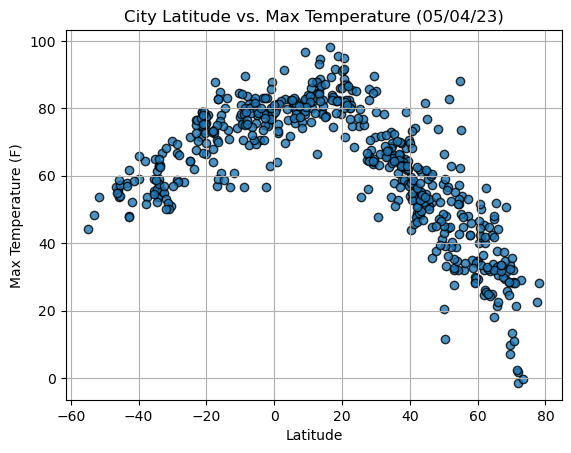

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Set title and labels
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

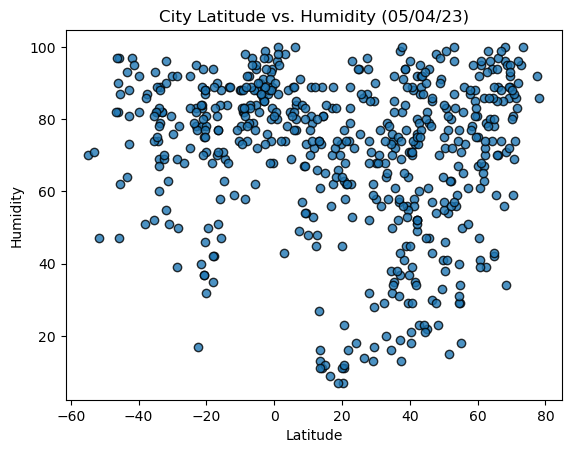

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

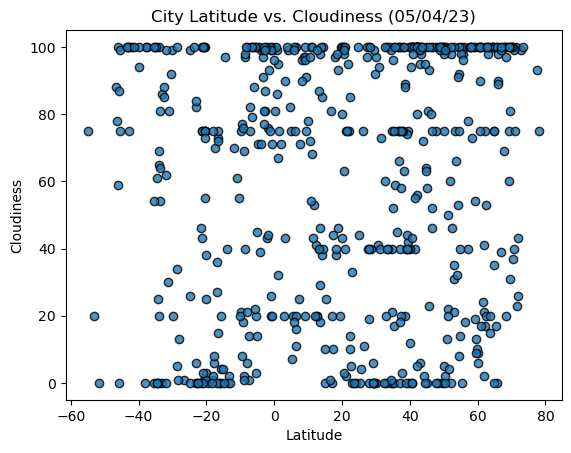

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

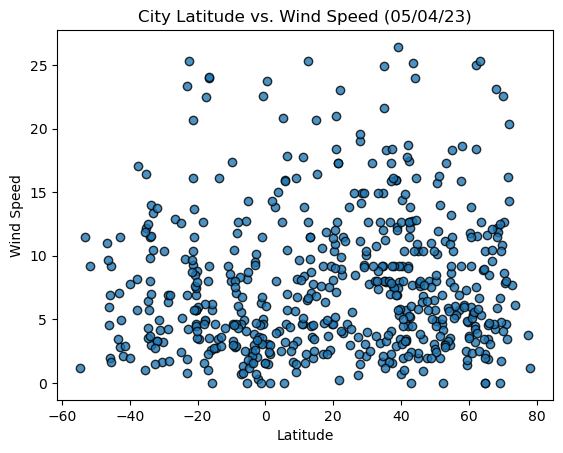

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("C:/Users/nigan/python-api-challenge/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Define a function to create Linear Regression plots
def scatter_with_regression(x, y):
    # Calculate regression line
    slope, intercept = np.polyfit(x, y, 1)
    regression_line = slope * x + intercept

In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nanortalik,60.1432,-45.2371,34.61,75,9,3.71,GL,1683237044
2,teya,60.3778,92.6267,40.14,92,100,11.77,RU,1683237045
3,lafiagi,8.8667,5.4167,81.25,67,97,5.68,NG,1683237045
4,nikolskoye,59.7035,30.7861,34.81,81,10,4.79,RU,1683237045
6,cabo san lucas,22.8909,-109.9124,85.60,53,0,11.50,MX,1683237045


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,76.66,78,82,23.35,PF,1683237044
5,vaini,-21.2000,-175.2000,78.96,83,75,16.11,TO,1683237045
10,pangani,-5.4333,38.9667,75.67,84,3,8.21,TZ,1683237046
13,mataura,-46.1927,168.8643,55.74,82,59,5.99,NZ,1683237046
14,souillac,-20.5167,57.5167,75.58,88,75,5.75,MU,1683237047


###  Temperature vs. Latitude Linear Regression Plot

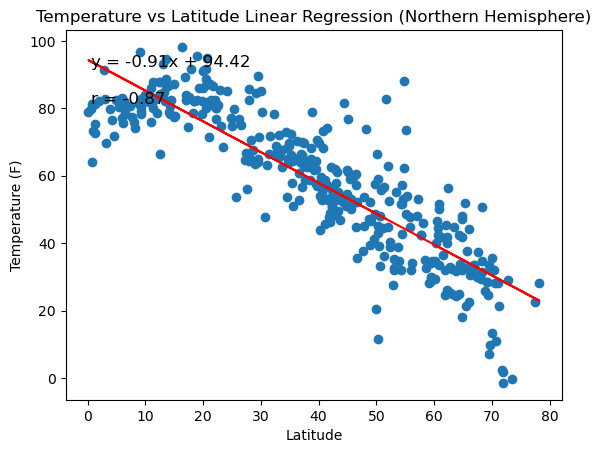

In [14]:
# Linear regression on Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Extract relevant columns from Northern Hemisphere DataFrame
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

# Perform linear regression on Northern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x, y)
regression_line = slope * x + intercept
ax.plot(x, regression_line, color='red')

# Set plot title and labels
ax.set_title('Temperature vs Latitude Linear Regression (Northern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature (F)')

# Add regression line formula to the plot
model_formula = f"y = {slope:.2f}x + {intercept:.2f}"
ax.annotate(model_formula, xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)

# Show plot
plt.show()


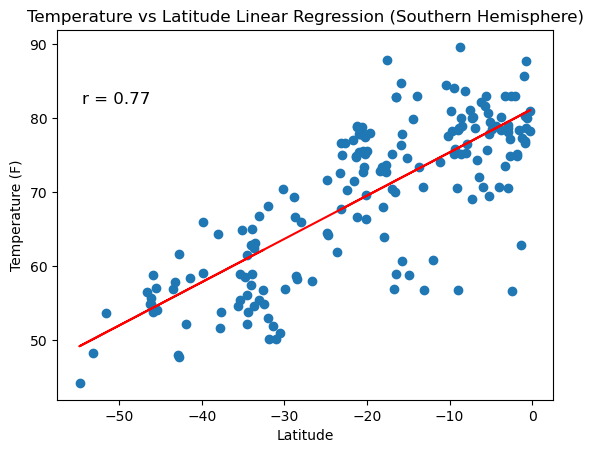

In [15]:
# Linear regression on Southern Hemisphere

# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Temperature vs Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Temperature (F)')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()


**Discussion about the linear relationship:** The lower the latitude the higher the temp in the northern hemisphere. It provides a strong R squared. The southern hemishpere shows the higher the latitude the higher the temp goes.

### Humidity vs. Latitude Linear Regression Plot

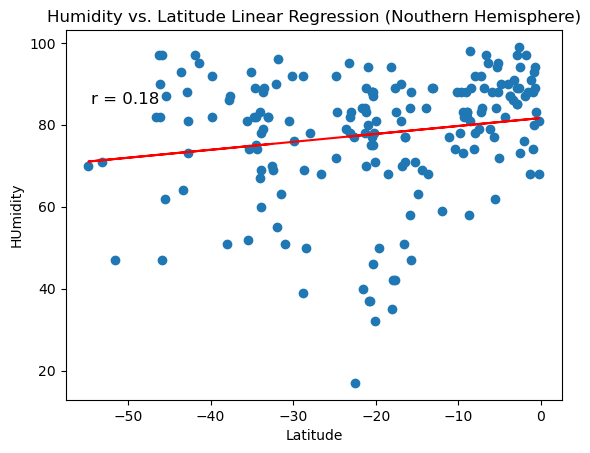

In [22]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Humidity vs. Latitude Linear Regression (Nouthern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('HUmidity')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

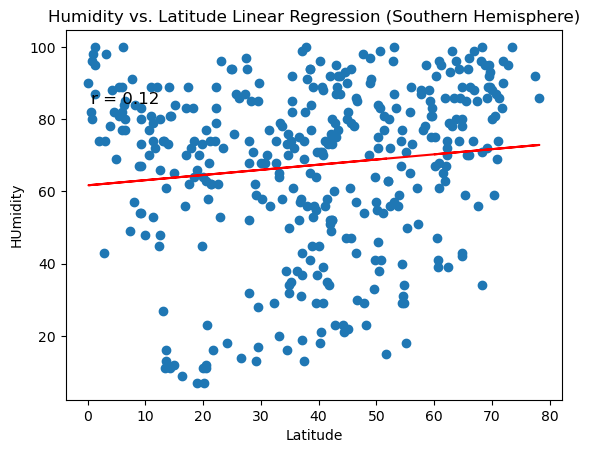

In [23]:
# Southern Hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Humidity vs. Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('HUmidity')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

**Discussion about the linear relationship:** Northern hemisphere shows higher humidity is spread out across most latitudes, the same observation can be made with the southern hemisphere. A weak r _squared explains why no patterns can be easily spotted.  

### Cloudiness vs. Latitude Linear Regression Plot

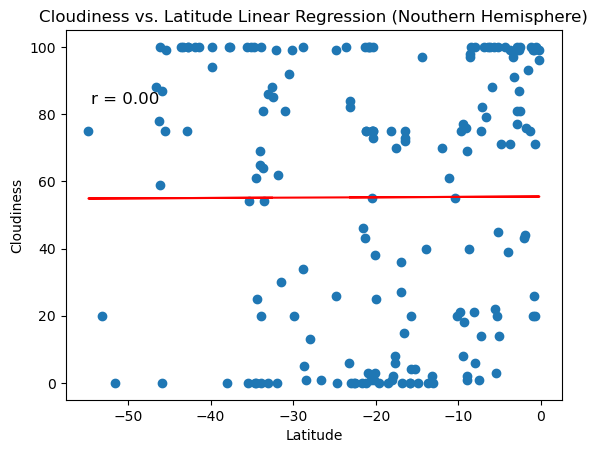

In [24]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Cloudiness vs. Latitude Linear Regression (Nouthern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

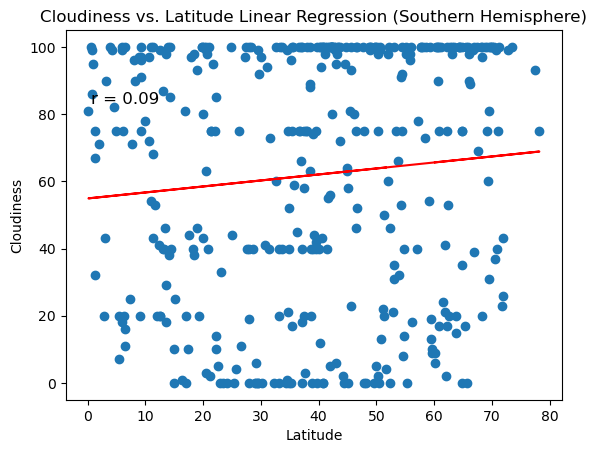

In [25]:
# Southern Hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere higher cloudiness clusters happen close to 0 latitude, but with the low r_squared there is no relationship. I cannot make a relationship on the southern hemisphere. The low r_squared here explains that.

### Wind Speed vs. Latitude Linear Regression Plot

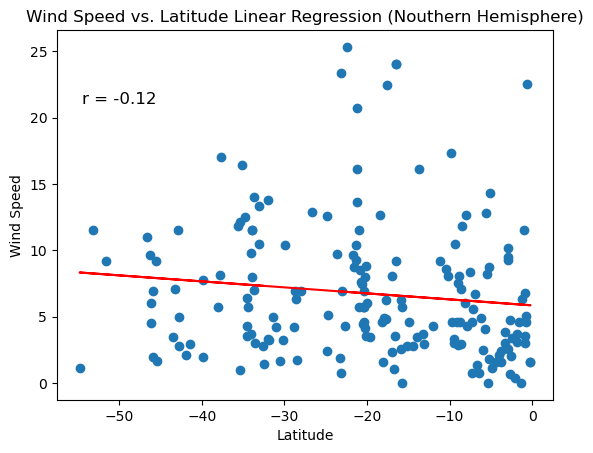

In [26]:
# Northern Hemisphere
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Define variables for x and y values
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Wind Speed vs. Latitude Linear Regression (Nouthern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

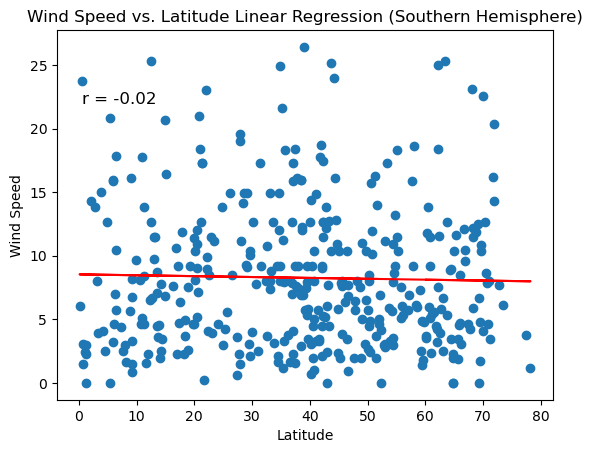

In [27]:
# Southern Hemisphere
southern_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Define variables for x and y values
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

# Calculate linear regression values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regression_line = slope * x_values + intercept

# Create scatter plot and regression line
fig, ax = plt.subplots()
ax.scatter(x_values, y_values)
ax.plot(x_values, regression_line, color='red')

# Set plot title and labels
ax.set_title('Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed')

# Add r-value to the plot
r_value = f"r = {rvalue:.2f}"
ax.annotate(r_value, xy=(0.05, 0.8), xycoords='axes fraction', fontsize=12)


# Show plot
plt.show()

**Discussion about the linear relationship:** It does not apprear to have ay type of relationship as wind speed is happening roughly the same through all latitudes.
In the northern hemisphere it looks roughly the same with points all over and no easily spotted patterns.